### Project Overview

A retail company wants to understand the spending behavior of its customers to target them with personalized marketing campaigns They have collected data on customer demographics ( gender) and spending habits (annual income, spending score) and want to segment their customers based on their spending behavior. The objective of this project is to build a customer segmentation model to help the retail company in developing targeted marketing strategies

### Project Objective

This project aims to segment customers based on their purchasing behavior and demographic information. We will use unsupervised machine learning techniques to identify groups of customers with similar behavior and characteristics. This information can be used to develop targeted marketing campaigns, personalize product recommendations, and optimize pricing strategies

In this project, we will use K-Means Clustering
- **K-Means clustering:** is an unsupervised machine learning technique suitable for working with unlabelled data that lacks predefined categories or groups. The primary objective of this algorithm is to group similar data points, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on the features that are provided.

In [1]:
# Import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset

data = pd.read_csv(r"C:\Users\Harrison\Downloads\Customers.csv")

data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Dictionary

The dataset contains the following columns:
- CustomerID: Unique identifier for each customer
- Genre: Gender of the customer
- Age: Age of the customer
- Annual_Income: Annual income of the customer
- Spending_Score: Spending score assigned to the customer

#### Data Inspection

In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

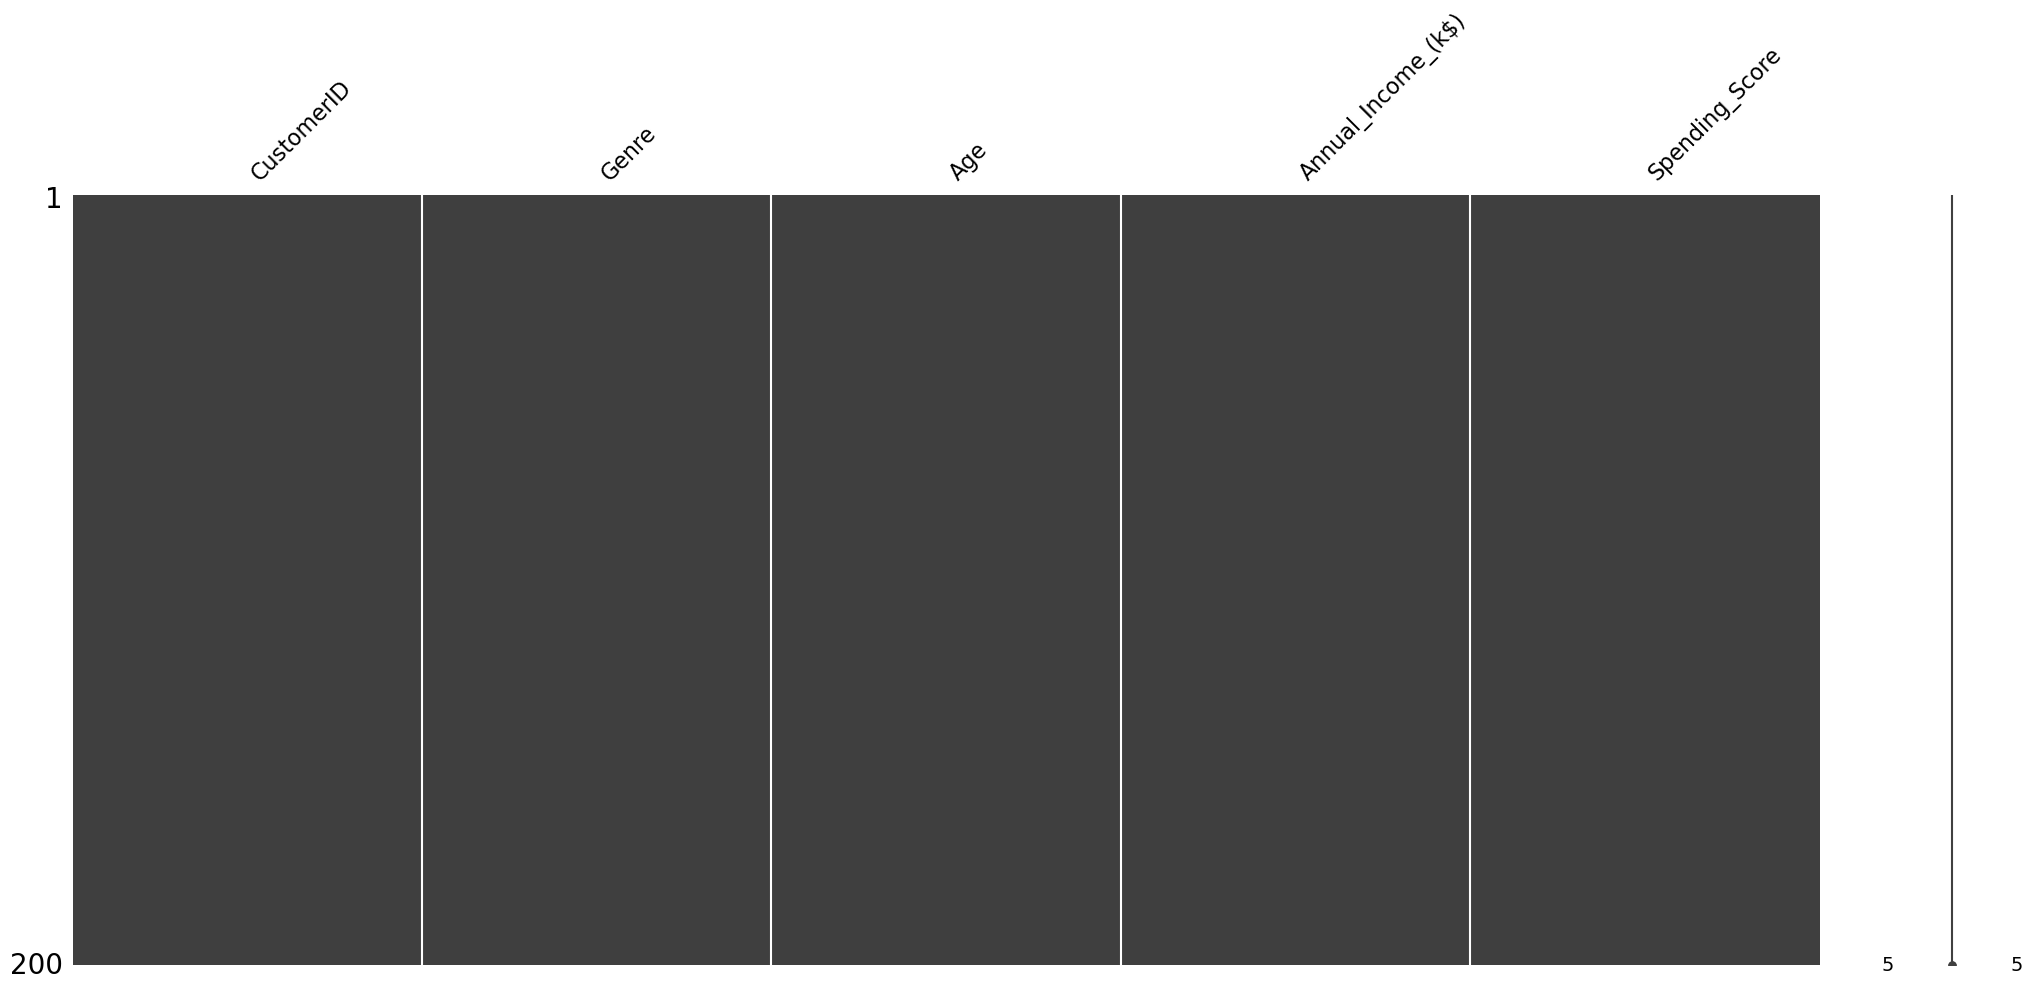

In [6]:
# Check for missing values
print(data.isnull().sum())

 # Visualizing the missing data
import missingno as msno

# Visualize nullity patterns
msno.matrix(data)

There are no missing values in our dataset

### Data Cleaning and Pre-Processing

In [7]:
# Check for duplicates
data.duplicated().sum()

0

Our data has no duplicates

In [8]:
# Drop CustomerID as it is not needed for clustering

data = data.drop('CustomerID', axis=1)

In [9]:
# Renaming the 'Genre' column to 'Gender'

data=data.rename(columns={"Genre": "Gender"})

In [10]:
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
# Categorizing Age bracket
def Age_group(Age):
    if Age <= 19:
        return "Teenager"
    elif Age <= 35:
        return "Youth"
    elif Age <= 55:
        return "Middle-Age"
    else:
        return "Elder"
data['Age_group'] = data['Age'].apply(Age_group)

In [12]:
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score,Age_group
0,Male,19,15,39,Teenager
1,Male,21,15,81,Youth
2,Female,20,16,6,Youth
3,Female,23,16,77,Youth
4,Female,31,17,40,Youth


In [13]:
data.columns

Index(['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score', 'Age_group'], dtype='object')

### Exploratory Data Analysis

- Univaritae
- Bivariate
- Multivariate

#### Analyze the distribution of numerical features
- Plot histograms and box plots for numerical features like Age, Annual_Income, and Spending_Score:

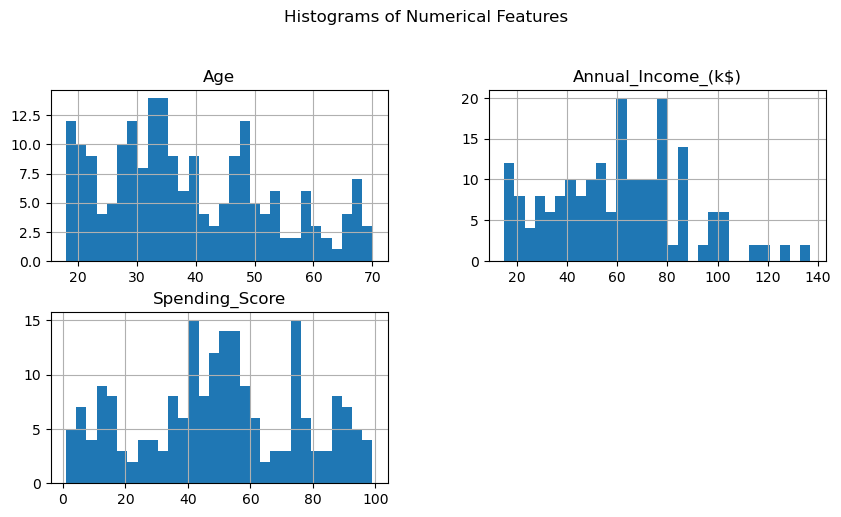

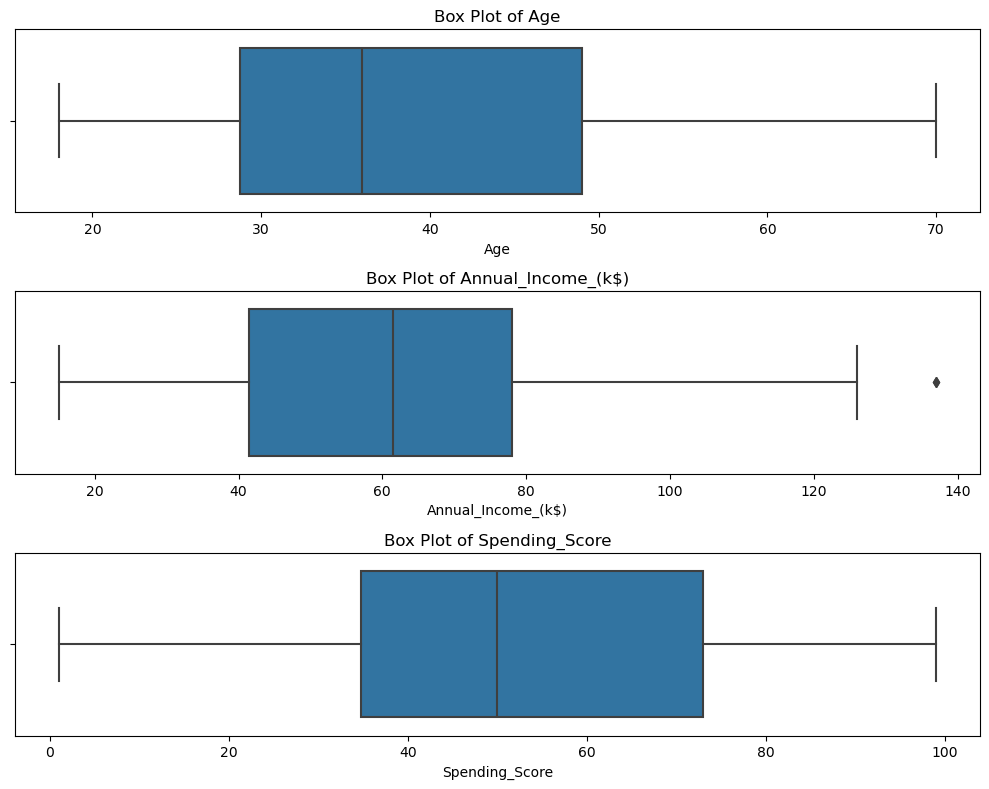

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
data.hist(bins=30, figsize=(10, 8), layout=(3, 2))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot box plots
plt.figure(figsize=(10, 8))
for i, column in enumerate(['Age', 'Annual_Income_(k$)', 'Spending_Score']):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

We can observe one outliers or extreme values in the Annual_Income

#### Analyze the distribution of categorical features
- Plot bar charts for categorical features like Gender and Age_group:

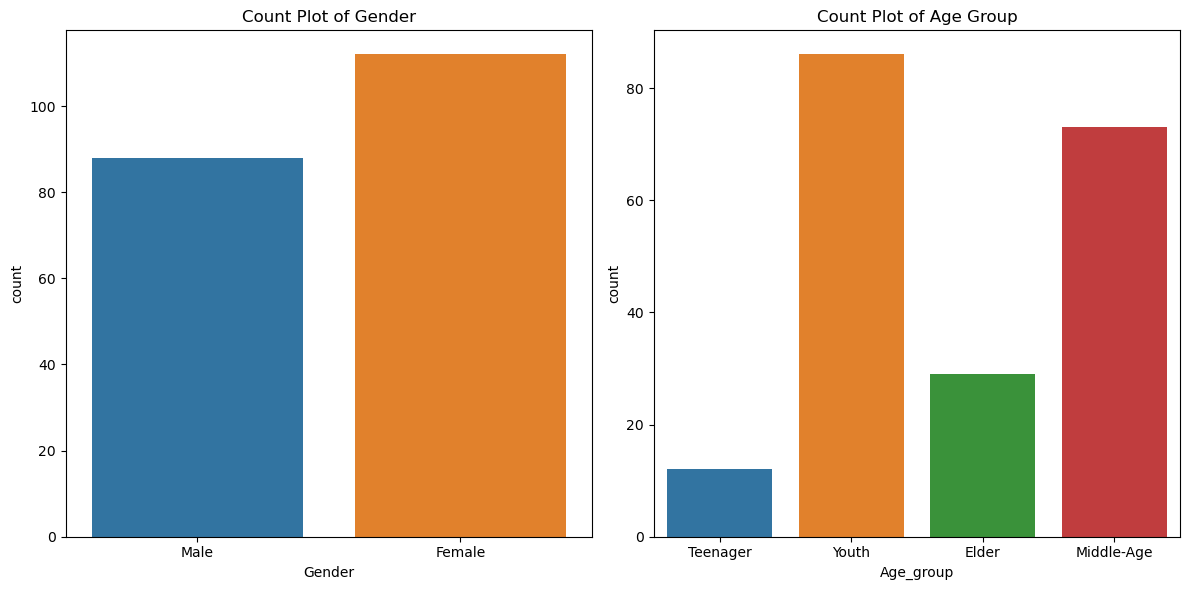

In [15]:

# Plot bar charts for categorical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Count Plot of Gender')

plt.subplot(1, 2, 2)
sns.countplot(x='Age_group', data=data)
plt.title('Count Plot of Age Group')

plt.tight_layout()
plt.show()


The majority of our customers are female customers.

#### Examine relationships between different features
- Create scatter plots and pair plots to examine relationships between different features:

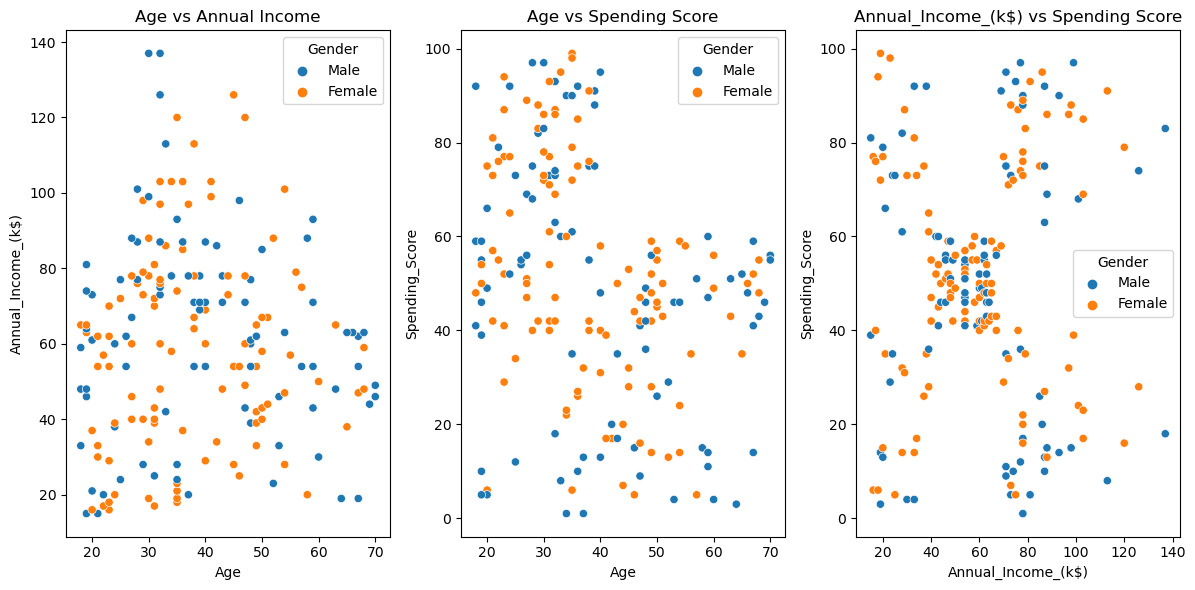

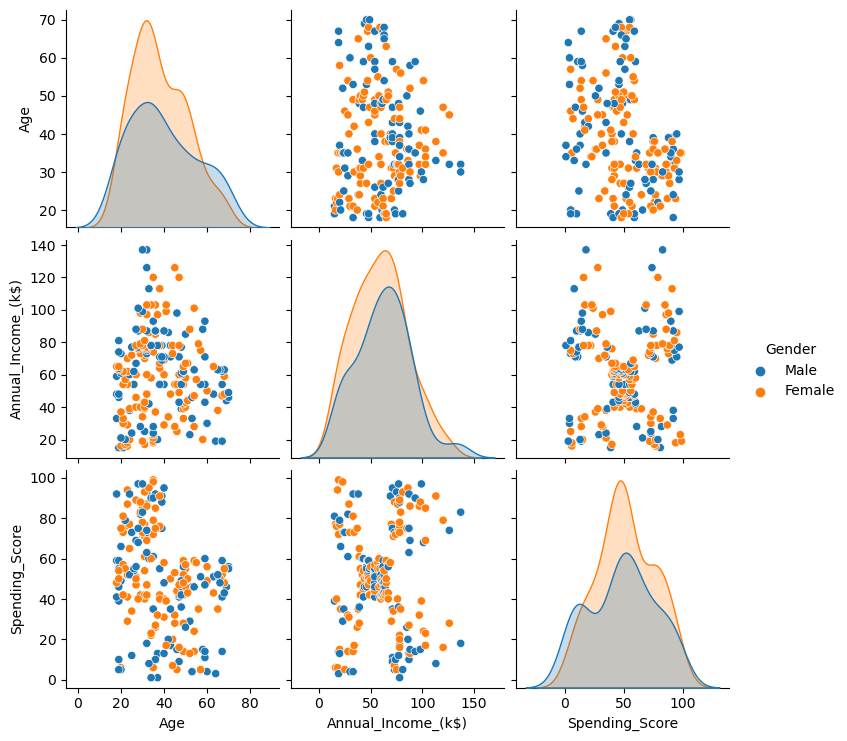

In [16]:
# Scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Annual_Income_(k$)', hue='Gender', data=data)
plt.title('Age vs Annual Income')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Spending_Score', hue='Gender', data=data)
plt.title('Age vs Spending Score')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Gender', data=data)
plt.title('Annual_Income_(k$) vs Spending Score')

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(data, hue='Gender')
plt.show()


- The scatter plots reveal correlations, such as higher income customers having varied spending scores, indicating different spending habits.
- Customers with higher annual income do not necessarily have higher spending scores.
- Certain age groups have higher spending scores, indicating more active spending behavior.

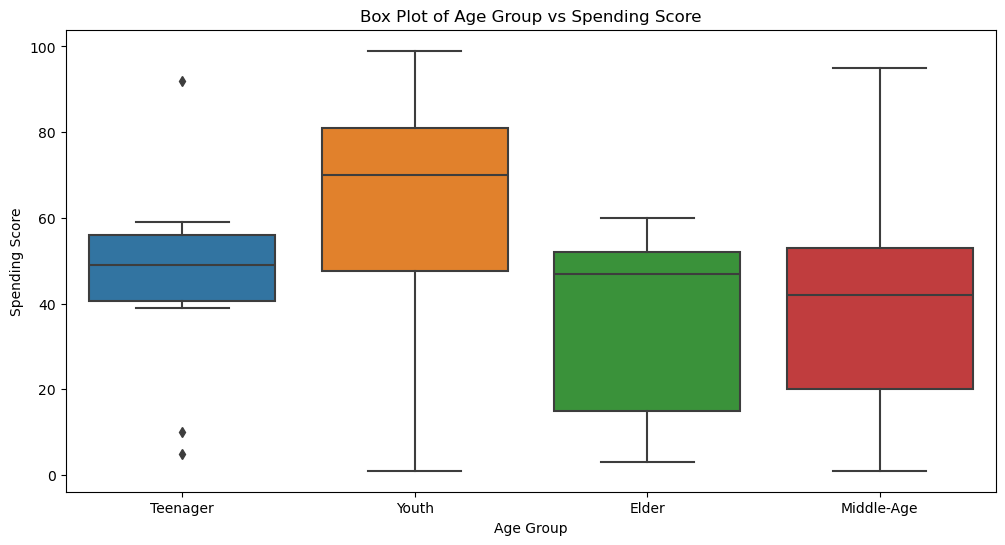

In [17]:
# Create a box plot for Age_group vs Spending_Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_group', y='Spending_Score', data=data)
plt.title('Box Plot of Age Group vs Spending Score')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.show()


- Youth stands out as the age group with the highest and most variable spending scores, making them a key target for high-value marketing campaigns.
- Teenagers and middle-aged groups have moderate spending scores with some variability.
- Elders have the lowest and most consistent spending scores, suggesting they might be less responsive to aggressive marketing strategies focused on spending.

In [18]:
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score,Age_group
0,Male,19,15,39,Teenager
1,Male,21,15,81,Youth
2,Female,20,16,6,Youth
3,Female,23,16,77,Youth
4,Female,31,17,40,Youth


In [19]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender as a numerical variable
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Drop 'Age_group as it is not needed for clustering

data = data.drop('Age_group', axis=1)

data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


The dataset has been preprocessed:

- The Gender column has been encoded as a numerical variable.
- The Age_group column has been dropped, as it is not needed

### Modelling

We will use the K-means clustering algorithm to segment the customers. To determine the optimal number of clusters, we'll use the elbow method. 

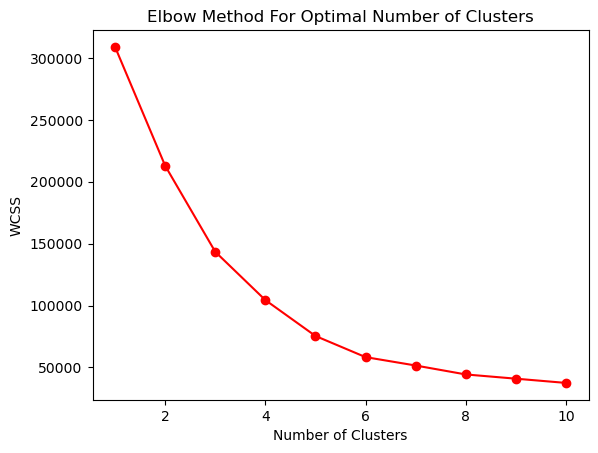

In [20]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method graph shows a noticeable "elbow" k=5, which suggests that 5 clusters might be optimal.

Let's proceed with K-Means clustering using 5 clusters to segment the customers

In [21]:
# Fit K-means clustering model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=1)
kmeans.fit(data)

# Add ckuster label to data
data['Cluster'] = kmeans.labels_

In [22]:
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,19,15,39,3
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,3


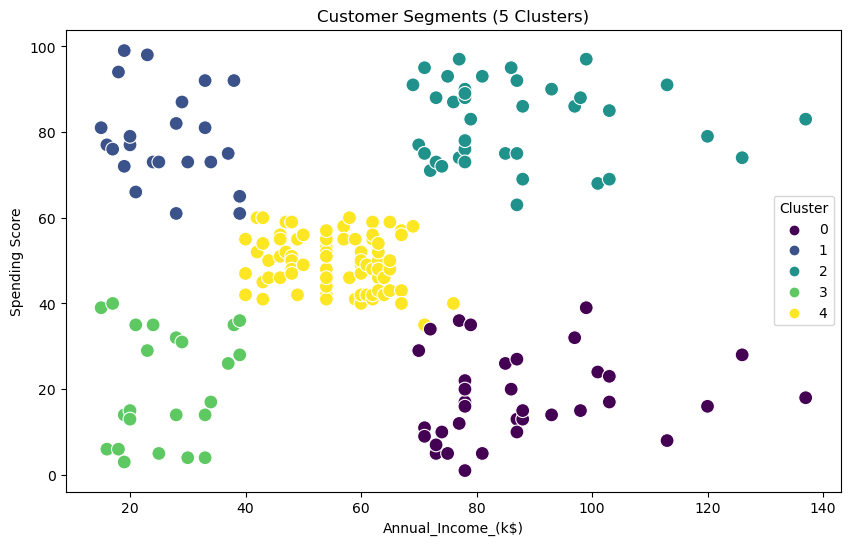

In [23]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', palette='viridis', data=data, s=100)
plt.title('Customer Segments (5 Clusters)')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')

plt.show()

The plot shows five distinct clusters, each represented by a different color. The clusters are well-separated, indicating that the clustering algorithm has effectively differentiated between the groups based on the two variables: Annual Income (k$) and Spending Score.

### Evaluation

The silhouette score will be used to evaluate the clustering performance

- #### Silhouette Score

In [26]:
# Calculate silhouette score
sil_score = silhouette_score(data[['Annual_Income_(k$)', 'Spending_Score']], data['Cluster'])
print(f'Silhouette Score for 5 Clusters: {sil_score}')

Silhouette Score for 5 Clusters: 0.5503719213912603


In [27]:
silhouette_score(data, kmeans.labels_)
print(f'Silhouette Score for 3 Clusters: {sil_score:.2f}')

Silhouette Score for 3 Clusters: 0.55


- **Silhouette Score: 0.5503719213912603**:

  - The silhouette score ranges from -1 to 1, where a higher score indicates better-defined clusters. A score above 0.5 suggests that the clusters are reasonably well-separated and well-defined.
  - With a silhouette score of approximately 0.55, it can be concluded that the clustering model has performed quite well in identifying distinct customer segments. However, there's still room for improvement, as an ideal score would be closer to 1.

### Key Insights:

1. **Cluster Characteristics**:
   - **Cluster 0 (Purple)**: This cluster includes customers with a wide range of annual incomes (from around 50k to over 140k$) but generally lower spending scores (0-40).
   
   - **Cluster 1 (Blue)**: This cluster contains customers with lower to moderate annual incomes (about 10k to 40k) but high spending scores (60-100).
   - **Cluster 2 (Teal)**: These customers have a wide range of annual incomes (70k to about 140k$) and high spending scores (60-100).
   
   - **Cluster 3 (Green)**: This cluster includes customers with lower to moderate annual incomes (10k to about 40k$) and low to moderate spending scores (0-40).
   
   - **Cluster 4 (Yellow)**: Customers in this cluster have moderate annual incomes (40k to 70k$) and moderate spending scores (40-60).

2. **Income vs. Spending Behavior**:
   - High spenders (high spending scores) tend to fall into distinct clusters based on their annual income levels. For example, Cluster 1 and Cluster 2 both have high spending scores but different income ranges.

- **Potential Marketing Strategies**:
   - **High Income, High Spending (Cluster 2)**: These customers could be targeted with premium products and services.
   - **Moderate Income, High Spending (Cluster 1)**: These customers might be interested in value-for-money offerings or loyalty programs.
   - **Wide Range Income, Low Spending (Cluster 0)**: This group might be more price-sensitive or less engaged; strategies could include promotions or educational marketing to increase engagement.

### Conclusion

The clustering analysis has successfully identified five distinct customer segments based on annual income and spending score. The relatively high silhouette score indicates that the clusters are well-defined and meaningful, providing valuable insights for targeted marketing strategies and customer relationship management. Future efforts might focus on refining the clustering process or exploring additional features to further enhance cluster separation and understanding.